In [1]:
import numpy as np
import pandas as pd
import json
from pandas.io.json import json_normalize
import seaborn as sns
# Import matplotlib.pyplot
import matplotlib.pyplot as plt

#Understanding the data
dictionary = pd.read_excel("Desktop/Data Scientist/Capstone1/Data/neis-data-dictionary_terms.xlsx")
main       = pd.read_excel("Desktop/Data Scientist/Capstone1/Data/neisdatagovhack_Main.xlsx")
dict_df = pd.DataFrame.from_dict(dictionary, orient='columns', dtype=None)
main_df = pd.DataFrame.from_dict(main, orient='columns', dtype=None)
print(dict_df)
print(main_df.info())
print(main_df.describe())

         Variable name                               Variable description  \
0          business_id                 Unique identifier for the business   
1           start_date  The date the NEIS participant entered the NEIS...   
2             end_date  The date the NEIS participant exited the NEIS ...   
3            neis_type  The employment services program in which the b...   
4          exit_reason  The reason for which the NEIS participant exit...   
5           successful  Indicates whether the NEIS participant success...   
6          anzsic_code                 The industry code for the business   
7        industry_type       The broad industry category for the business   
8                state             The state or territory of the business   
9                metro  Indicates whether the location of the business...   
10           age_group                  Age group of the NEIS participant   
11           gender_cd              Sex indicator of the NEIS participant   

        business_id   anzsic_code         metro      sv_month       sv_year  \
count  53646.000000  53596.000000  53646.000000  11147.000000  11147.000000   
mean   26827.169258   7423.195780      0.058308      6.606262   2012.755898   
std    15488.324811   2428.965571      0.234327      3.435323      1.818195   
min        1.000000    100.000000      0.000000      1.000000   2009.000000   
25%    13414.250000   5259.000000      0.000000      4.000000   2011.000000   
50%    26827.500000   7869.000000      0.000000      6.000000   2012.000000   
75%    40239.750000   9525.000000      0.000000     10.000000   2014.000000   
max    53654.000000   9901.000000      1.000000     12.000000   2017.000000   

       sv_hours_work  sv_staff_lt35h  sv_staff_gt35h  sv_end_train  \
count    8102.000000     5803.000000     5296.000000   3049.000000   
mean       35.280449        0.558849        0.405778      1.296491   
std        21.909007        2.007426        2.342488      0.598547   
min     

In [2]:
dict_df.columns = ['var_name','var_descr','var_coding','var_categ','notes']
#Data Cleaning
dict_df = dict_df.replace(np.nan, 0, regex=True)
main_df = main_df.replace(np.nan, 0, regex=True)
print(dict_df)
print(main_df.head(20))

              var_name                                          var_descr  \
0          business_id                 Unique identifier for the business   
1           start_date  The date the NEIS participant entered the NEIS...   
2             end_date  The date the NEIS participant exited the NEIS ...   
3            neis_type  The employment services program in which the b...   
4          exit_reason  The reason for which the NEIS participant exit...   
5           successful  Indicates whether the NEIS participant success...   
6          anzsic_code                 The industry code for the business   
7        industry_type       The broad industry category for the business   
8                state             The state or territory of the business   
9                metro  Indicates whether the location of the business...   
10           age_group                  Age group of the NEIS participant   
11           gender_cd              Sex indicator of the NEIS participant   

Index(['business_id', 'start_date', 'end_date', 'neis_type', 'exit_reason',
       'successful', 'anzsic_code', 'industry_type', 'state', 'metro',
       'age_group', 'gender_cd', 'indigenous_ind', 'ex_offender_ind',
       'nesb_ind', 'refugee_ind', 'disability_ind', 'homeless_ind',
       'sole_parent_ind', 'neis_allowance_ind', 'surveyed', 'sv_month',
       'sv_year', 'sv_in_operation', 'sv_hours_work', 'sv_staff_lt35h',
       'sv_staff_gt35h', 'sv_end_train', 'sv_end_mentor', 'sv_end_profit',
       'sv_end_dem', 'sv_end_loc', 'sv_end_health', 'sv_end_oth',
       'sv_sat_bus_train', 'sv_sat_mentor', 'sv_tailor_sup', 'sv_sat_overall'],
      dtype='object')
Index(['var_name', 'var_descr', 'var_coding', 'var_categ', 'notes'], dtype='object')
                                             Age                          \
AgeVal                                     15_19 20_24 25_29 30_34 35_39   
industry_type                   successful                                 
accommodation_c

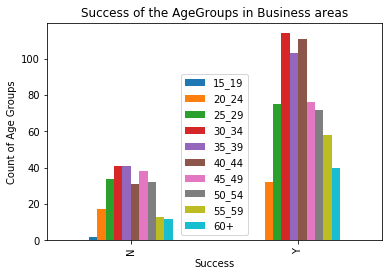

In [4]:
print(main_df.columns)
print(dict_df.columns)

# Different age groups that are successfull in different industries
main_melt = pd.melt(main_df,id_vars=['industry_type','successful'], value_vars=['age_group'],var_name='Age',value_name='AgeVal')

# Replace N/A values with 0 in the columns of pivot table
main_pivot = main_melt.pivot_table(values=None, index=['industry_type','successful'], columns='AgeVal', aggfunc='count', fill_value=0, margins=False, dropna=True, margins_name='All')
print(main_pivot)


industries = main_pivot.index.get_level_values(0).unique()
for industry in industries:
    split = main_pivot.xs(industry)
    age_group = split["Age"]

age_group.plot(kind="bar").legend(loc='lower center')
plt.xlabel('Success')
plt.ylabel('Count of Age Groups')
plt.title('Success of the AgeGroups in Business areas')
plt.show()

                                           State                            \
StateVal                                     ACT   NSW  NT   QLD   SA  TAS   
industry_type                   successful                                   
accommodation_cafes_restaurants N              3   101   0    42   18   14   
                                Y              4   174   1    75   56   33   
agriculture_forestry_fishing    N              0    82   0    51   11    6   
                                Y              3   202   2   109   40   24   
communication                   N              0    43   0    19    7    0   
                                Y              1    54   0    38   14    1   
construction                    N              8   207   2   159   34   24   
                                Y             15   500   7   408  121   58   
cultural_and_recreational       N             28   616   3   326  146   46   
                                Y             50  1447  17   829

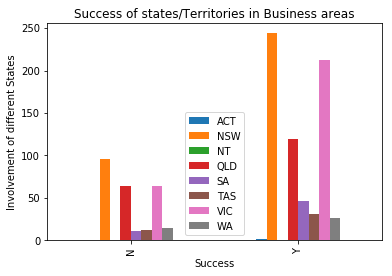

In [24]:
main_melt2 = pd.melt(main_df,id_vars=['industry_type','successful'], value_vars=['state'],var_name='State',value_name='StateVal')
# Replace N/A values with 0 in the columns of pivot table
main_pivot2 = main_melt2.pivot_table(values=None, index=['industry_type','successful'], columns='StateVal', aggfunc='count', fill_value=0, margins=False, dropna=True, margins_name='All')
print(main_pivot2)
industries = main_pivot2.index.get_level_values(0).unique()
for industry in industries:
    split = main_pivot2.xs(industry)
    state = split["State"]
    
state.plot(kind="bar").legend(loc='lower center')
plt.xlabel('Success')
plt.ylabel('Involvement of different States')
plt.title('Success of states/Territories in Business areas')
plt.show()

In [23]:
#### Success/Failure in business for various personalities#######

main_melt3 = pd.melt(main_df,id_vars=['industry_type','successful'], value_vars=['indigenous_ind', 'ex_offender_ind',
       'nesb_ind', 'refugee_ind', 'disability_ind', 'homeless_ind',
       'sole_parent_ind'],var_name='Personality',value_name='PersVal')
main_filter3 = main_melt3.query("PersVal == 'Y'")
#main_filter3 = main_melt3.query("indigenous_ind == 'Y' or ex_offender_ind == 'Y' or nesb_ind == 'Y' or refugee_ind == 'Y' or disability_ind == 'Y' or homeless_ind == 'Y'")
#main_filter3.replace(to_replace=dict(Y=1, N=0), inplace=True)

# Replace N/A values with 0 in the columns of pivot table
main_pivot3 = main_filter3.pivot_table(values=None, index=['industry_type','successful'], columns='Personality', aggfunc='count', fill_value=0, margins=False, dropna=True, margins_name='All')
print(main_pivot3)
#main_pivot3.reset_index()


#sns.barplot(data = main_pivot3, x = 'Personality', y = 'disability_ind', hue = 'successful')

                                                  PersVal                  \
Personality                                disability_ind ex_offender_ind   
industry_type                   successful                                  
accommodation_cafes_restaurants N                      65               5   
                                Y                     107               7   
agriculture_forestry_fishing    N                      70               7   
                                Y                     151              26   
communication                   N                      23               4   
                                Y                      42              12   
construction                    N                     199              71   
                                Y                     440             141   
cultural_and_recreational       N                     448              76   
                                Y                     864              81   